In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Baseline BERT model
## Empathy

In [47]:
baseline_hist = pd.read_csv('../output/baseline_BERT/history.csv')
baseline_hist.epoch = baseline_hist.epoch.astype(int)
baseline_hist

,Unnamed: 0,epoch,avrg_dev_loss,avrg_dev_r2,dev_corr,train_corr
0,0,0,0.111060,-1.835447,0.349145,0.508699
1,1,1,0.079650,-0.972982,0.414533,0.722766
2,2,2,0.091264,-1.693017,0.424378,0.862271
3,3,3,0.098224,-1.094197,0.387946,0.925982
4,4,4,0.090735,-0.922095,0.388936,0.957108
5,5,5,0.092627,-1.102511,0.387649,0.971523
6,6,6,0.096400,-1.955939,0.376010,0.980518
7,7,7,0.088465,-1.090226,0.375544,0.984313
8,8,8,0.090737,-2.156582,0.380138,0.988293
9,9,9,0.091585,-0.596041,0.380461,0.989736


In [48]:
baseline_hist.epoch.max()

9

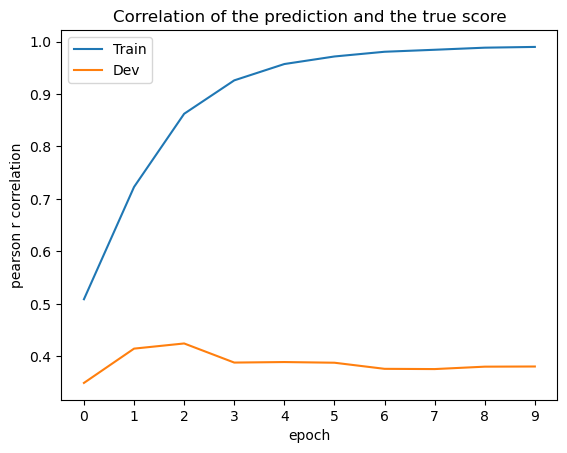

In [49]:
plt.plot(baseline_hist[['train_corr', 'dev_corr']], label=['Train', 'Dev'])
plt.title('Correlation of the prediction and the true score')
plt.ylabel('pearson r correlation')
plt.xlabel('epoch')
plt.xticks(np.array(range(baseline_hist.epoch.max() + 1)))
plt.legend()
plt.show()

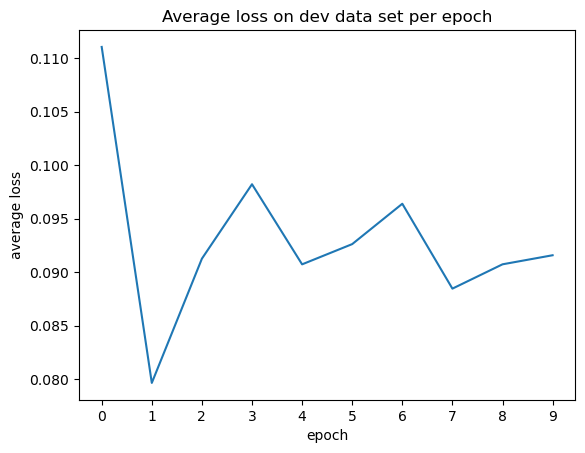

In [50]:
plt.plot(baseline_hist[['avrg_dev_loss']])
plt.title('Average loss on dev data set per epoch')
plt.ylabel('average loss')
plt.xlabel('epoch')
plt.xticks(np.array(range(baseline_hist.epoch.max() + 1)))
plt.show()

# Compare adapters to full-fine tuning

### With same learning rate (5e-5)

Using "Multi input" - One parameter for empathy ranking

In [12]:
multi_input_model = pd.read_csv('../output/history_multiinput_distress_22-04-12_1100.csv')  
multi_input_model.epoch = multi_input_model.epoch.astype(int)
apater_model = pd.read_csv('../output/history_adapters_distress_22-04-12_1100.csv')
apater_model.epoch = apater_model.epoch.astype(int)
multi_input_apater_model = pd.read_csv('../output/history_multiinput_adapters_distress_22-04-12-_1119.csv')  # wihtuot multiinput
multi_input_apater_model.epoch = multi_input_apater_model.epoch.astype(int)
multi_input_apater_model

,Unnamed: 0,epoch,avrg_dev_loss,avrg_dev_r2,dev_corr,train_corr,avrg_train_loss,train_time_elapsed,model_saved
0,0,0,0.092437,NaN,0.323553,0.464012,0.124348,21.005144,1.0
1,1,1,0.092772,NaN,0.320983,0.481346,0.086356,21.344107,0.0
2,2,2,0.092813,NaN,0.325037,0.493214,0.084722,21.598935,0.0
3,3,3,0.092872,NaN,0.333392,0.505923,0.084812,21.715295,0.0
4,4,4,0.092960,NaN,0.344211,0.510379,0.082473,21.841252,0.0
5,5,5,0.093663,NaN,0.342643,0.524160,0.079631,21.903776,0.0
6,6,6,0.090760,NaN,0.357888,0.529794,0.079669,22.098775,0.0
7,7,7,0.090304,NaN,0.369066,0.535620,0.078480,22.245062,0.0
8,8,8,0.093531,NaN,0.375156,0.540740,0.078184,22.275574,0.0
9,9,9,0.091980,NaN,0.379112,0.545656,0.076368,22.295288,0.0


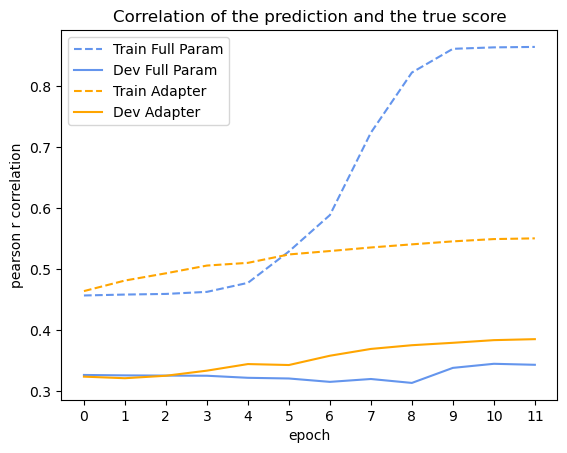

In [18]:
plt.plot(multi_input_model[['train_corr']], label='Train Full Param', c='cornflowerblue', linestyle="--")
plt.plot(multi_input_model[['dev_corr']], label='Dev Full Param', c='cornflowerblue', linestyle="-")
plt.plot(multi_input_apater_model[['train_corr']], label='Train Adapter', c='orange', linestyle="--")
plt.plot(multi_input_apater_model[['dev_corr']], label='Dev Adapter', c='orange', linestyle="-")
plt.title('Correlation of the prediction and the true score')
plt.ylabel('pearson r correlation')
plt.xlabel('epoch')
plt.xticks(np.array(range(multi_input_model.epoch.max() + 1)))
plt.legend()
plt.show()

### Compare models without additional input 
Full fine tuning: 2e-5 (was better with smaller learnign rate)
adapters: 5e-5